<a href="https://colab.research.google.com/github/fdmy2713-dotcom/ADS1/blob/main/Farah_ADS1_Assignment_Statistics_and_Trends_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# **1. Relational Graph**

In [2]:
# Load the datasets
df_residents_65plus = pd.read_csv('DataGov_Residents_65Plus.csv', index_col='year')

# Print out the dataframe
print("Residents 65Plus Data:")
print(df_residents_65plus)

# Load the datasets
df_nursinghome = pd.read_csv('DataGov_NursingHome_Beds.csv', index_col='year')

# Print out the dataframe
print("\nNursing Home Data:")
print(df_nursinghome)

Residents 65Plus Data:
         Age Category  Living With Spouse & At Least One Child In Household  \
year                                                                          
2024        Sub-Total                                             271800      
2023        Sub-Total                                             243700      
2022        Sub-Total                                             255800      
2021        Sub-Total                                             221800      
2020        Sub-Total                                             214600      
...               ...                                                ...      
2014  85 Years & Over                                               5700      
2013  85 Years & Over                                               5100      
2012  85 Years & Over                                               4800      
2011  85 Years & Over                                               4000      
2010  85 Years & Over        

In [11]:
# Load the datasets
#df_residents_65plus = pd.read_csv('DataGov_Residents_65Plus.csv')
#df_nursinghome = pd.read_csv('DataGov_NursingHome_Beds.csv')

# Prepare Residents Data
# Keep only year and total residents aged 65+
df_residents = df_residents_65plus[['year', 'Total']].copy()
df_residents['Total'] = pd.to_numeric(df_residents['Total'], errors='coerce')

# Group by year (some datasets may repeat year entries)
df_residents = df_residents.groupby('year', as_index=False)['Total'].sum()
df_residents = df_residents.rename(columns={'Total': 'Residents65Plus'})

# Prepare Nursing Home Data
# Sum total number of beds by year
df_nursinghome_beds = df_nursinghome.groupby('year', as_index=False)['no_beds'].sum()
df_nursinghome_beds = df_nursinghome_beds.rename(columns={'no_beds': 'NursingHomeBeds'})

# Merge both datasets by year
df_merge = pd.merge(df_residents, df_nursinghome_beds, on='year', how='inner')

In [15]:
# Relational Graph (Scatter Plot with Regression Line)
# Showing the correlation how the number of nursing home beds relates to number of elderly residents (65+).

# Define plotting function
def plot_relational(df):
    """
    Scatter + regression line showing how the number of nursing home beds relates to
    number of elderly residents (65+).
    """
    plt.figure(dpi=144)
    sns.scatterplot(data=df, x="Residents65Plus", y="NursingHomeBeds", s=100)
    sns.regplot(data=df, x="Residents65Plus", y="NursingHomeBeds", scatter=False, color="red")

    for _, row in df.iterrows():
        plt.text(row["Residents65Plus"], row["NursingHomeBeds"], str(row["year"]),
                 fontsize=8, ha='right', va='bottom')

    # Add Title and Labels
    plt.title("Relation: Elderly Residents (65+) vs Nursing Home Beds (Singapore)")
    plt.xlabel("Number of Residents 65+")
    plt.ylabel("Number of Nursing Home Beds")
    plt.tight_layout()

    # Show the Plot
    plt.show()

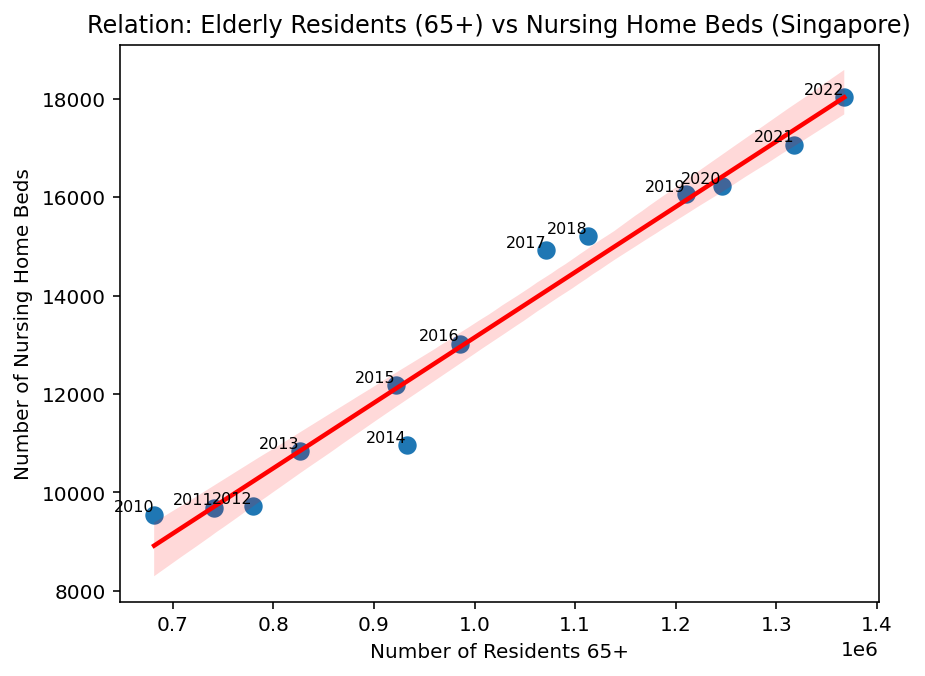

In [13]:
# Call the plotting function
plot_relational(df_merge)

In [14]:
# Display the merged dataset for verification
print("\nMerged Dataset (for plotting):")
print(df_merge)


Merged Dataset (for plotting):
    year  Residents65Plus  NursingHomeBeds
0   2010           681500             9551
1   2011           740600             9690
2   2012           779700             9721
3   2013           826200            10838
4   2014           932700            10968
5   2015           921900            12185
6   2016           985400            13022
7   2017          1071200            14918
8   2018          1112600            15205
9   2019          1210000            16059
10  2020          1245900            16221
11  2021          1317800            17064
12  2022          1367600            18029


# **2. Categorical Graph**

# **3. Statistical Graph**